In [116]:
%matplotlib inline
from sklearn import tree
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
df = pd.read_csv(os.path.join("Resources","Data", "clean_data.csv"))
df.head(5)

,Unnamed: 0,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,292568851.0,PG-13,8.8,1953512.0,74.0
1,1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,448130642.0,PG-13,8.4,1454342.0,78.0
2,2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,158737441.0,PG-13,8.6,1413039.0,74.0
3,3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,162804648.0,R,8.4,1282957.0,81.0
4,4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,623279547.0,PG-13,8.0,1225316.0,69.0


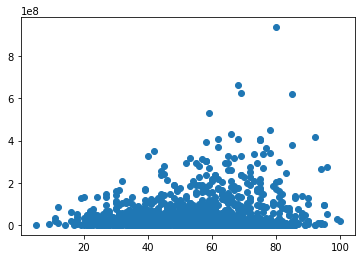

In [118]:
X, y = df[['Metascore']], df['Box Office']
plt.scatter(X, y)

In [119]:
model = LinearRegression()

In [120]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
model.score(X, y)

0.018331013325078804

In [122]:
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 6525289441088227.0
R-squared (R2 ): 0.018331013325078804


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
model.score(X_test, y_test)

0.017149122998371902

In [125]:
print('M value: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

M value:  [607434.85457358]
y-axis intercept:  15718269.614325516


In [126]:
print(f'our equation is y ={model.coef_}X+{model.intercept_}')

our equation is y =[607434.85457358]X+15718269.614325516


In [127]:
print(f"True output: {y[0]}")
print(f"Predicted output: {predicted[0]}")
print(f"Prediction Error: {predicted[0]-y[0]}")

True output: 292568851.0
Predicted output: 59710323.136759035
Prediction Error: -232858527.86324096


In [128]:
dataframe = pd.DataFrame({"predicted": predicted, "Actual": y, "Error": predicted - y})[["predicted", "Actual", "Error"]]
dataframe.head()

,predicted,Actual,Error
0,5.971032e+07,292568851.0,-2.328585e+08
1,6.227073e+07,448130642.0,-3.858599e+08
2,5.971032e+07,158737441.0,-9.902712e+07
3,6.419104e+07,162804648.0,-9.861361e+07
4,5.650981e+07,623279547.0,-5.667697e+08


In [129]:
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()

In [130]:
y_min = 15718269.614325516 + 607434.85457358 * x_min
y_max = 15718269.614325516 + 607434.85457358 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 411.0
Calculated Min Value: Metascore    1.875544e+07
dtype: float64
Actual Max Value: 936658640.0
Calculated Max Value: Metascore    7.646176e+07
dtype: float64


In [131]:
y_min_predicted = model.predict([x_min])
y_max_predicted = model.predict([x_max])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 411.0
Predicted Min Value: [18755443.8871934]
Actual Max Value: 936658640.0
Predicted Max Value: [76461755.0716833]


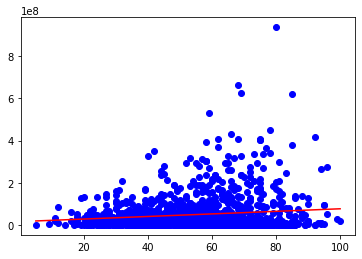

In [132]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')